In [19]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_auc_score
sns.set()
df_all = pd.read_pickle("unet_evalutation.pickle").dropna()
#df["model_scale"] = df["model"].apply(lambda x: 1.0 if x == "unet_quip_10000" else 0.5)
#df["scale_diff"] = df["model_scale"] - df["scale"]
#df = df[df["scale_diff"] >= 0 ]
df_all["auc"] = [roc_auc_score(tpr, fpr) for fpr, tpr in zip(df_all["fpr"], df_all["tpr"])]

print(df_all["auc"])
df_all.sort_values('auc', ascending=True)

ValueError: continuous format is not supported

/home/arvid/.conda/envs/SweBCG91RT-Net/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


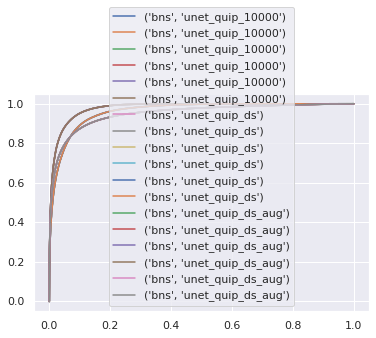

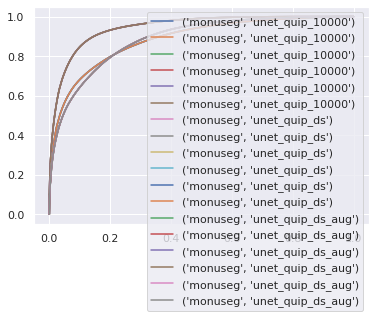

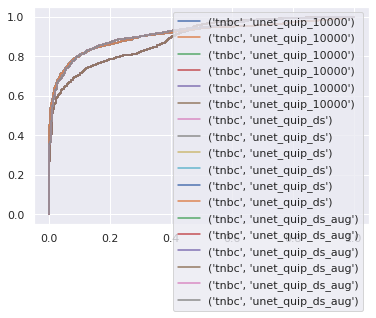

In [3]:
for name, df in df_all.groupby("dataset"):
    plt.figure()
    for n, row in df.iterrows():
        plt.plot(row["fpr"], row["tpr"], label=f"{row[\'dataset\'], row[\'model\']}")
    plt.legend()

<AxesSubplot:xlabel='dataset', ylabel='iou'>

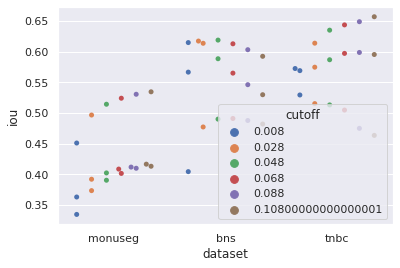

In [20]:
sns.swarmplot(
    data=df_all, x="dataset", y="iou", hue="cutoff", dodge=True
)

<AxesSubplot:xlabel='iou', ylabel='cutoff'>

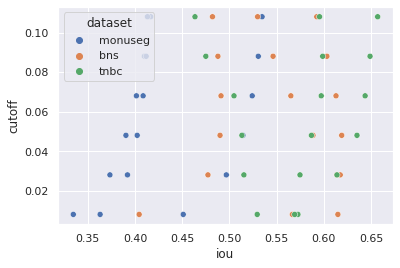

In [5]:
sns.scatterplot(
    data=df_all, x="iou", y="cutoff", hue="dataset"
)

In [6]:
plt.figure(figsize=(15,10))
sns.violinplot(
    data = df, x="scale", y="iou", hue=\'dataset\', inner="point"
)
# If target domain is smaller it's a good idéa to upscale before prediction.

ValueError: Could not interpret input 'scale'

<Figure size 1080x720 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,10))
#ax = sns.violinplot(
#   data = df, x="iou", y="cutoff", hue=\'scale\', dodge=True, orient="h", inner=None
#)

sns.scatterplot(
    data = df, x="iou", y="cutoff", hue=\'dataset\',  
)
